In [22]:
#from google.colab import drive
#drive.mount('/content/drive')

In [23]:
!pip install librosa

**Libraries for data loading(audio files) and visualization**

In [24]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Libraries for data handling from drive**

In [25]:
import os
from PIL import Image
import pathlib
import csv
import warnings
warnings.filterwarnings('ignore')

**checking the lengths ofour audio files in Emergency and nonemergency folder**

In [26]:
emg_len =[]
#k = "wavfiles"
for filename in os.listdir(f'/home/ncbc/Desktop/WorkSpace_NCBC/Siren/Bland Graphs of 10 files/ambulance/f1'):
    songname = f'/home/ncbc/Desktop/WorkSpace_NCBC/Siren/Bland Graphs of 10 files/ambulance/f1/{filename}'
    y, sr = librosa.load(songname, mono=True)
    c = librosa.get_duration(y=y , sr=sr)
    emg_len.append(c)

In [27]:
nonemg_len = []
#g = "road final"
for filename in os.listdir(f'/home/ncbc/Desktop/WorkSpace_NCBC/Siren/Bland Graphs of 10 files/ambulance/f2'):
    songname = f'/home/ncbc/Desktop/WorkSpace_NCBC/Siren/Bland Graphs of 10 files/ambulance/f2/{filename}'
    y, sr = librosa.load(songname, mono=True)
    #y, sr = librosa.load(songname)
    d = librosa.get_duration(y=y)
    nonemg_len.append(d)

**Maximum and Minimum lengths of audio file in emg and nonemg folder respectively .**

In [28]:
print(min(emg_len))
print(max(emg_len))

1.207437641723356
19.498684807256236


In [29]:
print(min(nonemg_len))
print(max(nonemg_len))

0.05002267573696145
18.75201814058957


In [30]:
file = open('ambulance mean.csv', 'w', newline='')

In [31]:
g = "Ambulance"
for filename in os.listdir(f'/home/ncbc/Desktop/WorkSpace_NCBC/Siren/Bland Graphs of 10 files/ambulance/f1'):
    songname = f'/home/ncbc/Desktop/WorkSpace_NCBC/Siren/Bland Graphs of 10 files/ambulance/f1/{filename}'
    y, sr = librosa.load(songname, mono=True, duration=1.2)
    rmse = librosa.feature.rms(y=y)
    to_append = f'{filename}'    
    for e in rmse:
        to_append += f' {np.mean(e)}'
    to_append += f' {g}'
    file = open('ambulance mean.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

In [32]:
col_names = ["filename","mean","label" ]
data = pd.read_csv("ambulance mean.csv", names=col_names)

In [33]:
data.head()

filename      mean      label
0  ambulance142.wav  0.308380  Ambulance
1  ambulance474.wav  0.085045  Ambulance
2  ambulance305.wav  0.130945  Ambulance
3  ambulance133.wav  0.383439  Ambulance
4  ambulance256.wav  0.117442  Ambulance

In [34]:
file_1 = open('internet_Ambulance_final.csv', 'w', newline='')

In [35]:
k = "Internet_Ambulance"
for filename in os.listdir(f'/home/ncbc/Desktop/WorkSpace_NCBC/Siren/Bland Graphs of 10 files/ambulance/f2'):
    audioname = f'/home/ncbc/Desktop/WorkSpace_NCBC/Siren/Bland Graphs of 10 files/ambulance/f2/{filename}'
    y, sr = librosa.load(audioname, mono=True, duration=1.2)
    rmse = librosa.feature.rms(y=y)
    to_append = f'{filename}'    
    for e in rmse:
        to_append += f' {np.mean(e)}'
    to_append += f' {k}'
    file_1 = open('internet_Ambulance_final.csv', 'a', newline='')
    with file_1:
        writer = csv.writer(file_1)
        writer.writerow(to_append.split())

In [36]:
col_names = ["filename","mean","label" ]
data_1 = pd.read_csv("internet_Ambulance_final.csv", names=col_names)

In [37]:
data_1.head(10)

filename      mean  \
0                                   ambulance888.wav  0.144520   
1                                   ambulance805.wav  0.114942   
2                                   ambulance775.wav  0.128419   
3  vlc-record-2021-11-30-16h23m20s-ambulance319.w...  0.276744   
4                                   ambulance715.wav  0.145318   
5  vlc-record-2021-11-30-16h24m30s-ambulance709.w...  0.348033   
6  vlc-record-2022-02-17-14h19m33s-ambulance177.w...  0.288839   
7                                   ambulance672.wav  0.426365   
8                                   ambulance885.wav  0.559240   
9                                    xgb3w-fyl7y.wav  0.630830   

                label  
0  Internet_Ambulance  
1  Internet_Ambulance  
2  Internet_Ambulance  
3  Internet_Ambulance  
4  Internet_Ambulance  
5  Internet_Ambulance  
6  Internet_Ambulance  
7  Internet_Ambulance  
8  Internet_Ambulance  
9  Internet_Ambulance

In [38]:
print(data.label.value_counts())
print(data_1.label.value_counts())

Ambulance    430
Name: label, dtype: int64
Internet_Ambulance    430
Name: label, dtype: int64


In [39]:
train = pd.concat([data , data_1]) 
train

filename      mean  \
0                                     ambulance142.wav  0.308380   
1                                     ambulance474.wav  0.085045   
2                                     ambulance305.wav  0.130945   
3                                     ambulance133.wav  0.383439   
4                                     ambulance256.wav  0.117442   
..                                                 ...       ...   
425  vlc-record-2022-02-17-14h18m35s-ambulance711.w...  0.349385   
426                                   ambulance801.wav  0.117174   
427                                   ambulance816.wav  0.132413   
428  vlc-record-2021-11-30-16h28m56s-ambulance317.w...  0.350959   
429                                   ambulance604.wav  0.185766   

                  label  
0             Ambulance  
1             Ambulance  
2             Ambulance  
3             Ambulance  
4             Ambulance  
..                  ...  
425  Internet_Ambulance  
426  Internet_Ambulance  
427  Internet_Ambulance  
428  Internet_Ambulance  
429  Internet_Ambulance  

[860 rows x 3 columns]

In [40]:
data=data['mean']
data

0      0.308380
1      0.085045
2      0.130945
3      0.383439
4      0.117442
         ...   
425    0.125720
426    0.124168
427    0.141089
428    0.196268
429    0.220944
Name: mean, Length: 430, dtype: float64

In [41]:
data_1=data_1['mean']
data_1

0      0.144520
1      0.114942
2      0.128419
3      0.276744
4      0.145318
         ...   
425    0.349385
426    0.117174
427    0.132413
428    0.350959
429    0.185766
Name: mean, Length: 430, dtype: float64

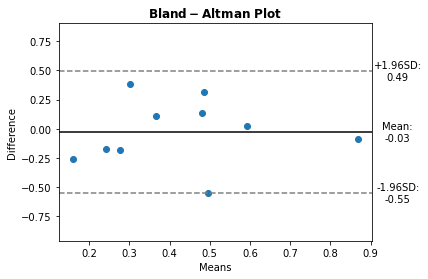

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pdb
from numpy.random import random

def bland_altman_plot(data, data_1, *args, **kwargs):
    data1     = np.asarray(data)
    data2     = np.asarray(data_1)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference
    CI_low    = md - 1.96*sd
    CI_high   = md + 1.96*sd

    plt.scatter(mean, diff, *args, **kwargs)
    plt.axhline(md,           color='black', linestyle='-')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')
    return md, sd, mean, CI_low, CI_high


md, sd, mean, CI_low, CI_high = bland_altman_plot(random(10), random(10))
plt.title(r"$\mathbf{Bland-Altman}$" + " " + r"$\mathbf{Plot}$")
plt.xlabel("Means")
plt.ylabel("Difference")
plt.ylim(md - 3.5*sd, md + 3.5*sd)

xOutPlot = np.min(mean) + (np.max(mean)-np.min(mean))*1.14

plt.text(xOutPlot, md - 1.96*sd, 
    r'-1.96SD:' + "\n" + "%.2f" % CI_low, 
    ha = "center",
    va = "center",
    )
plt.text(xOutPlot, md + 1.96*sd, 
    r'+1.96SD:' + "\n" + "%.2f" % CI_high, 
    ha = "center",
    va = "center",
    )
plt.text(xOutPlot, md, 
    r'Mean:' + "\n" + "%.2f" % md, 
    ha = "center",
    va = "center",
    )
plt.subplots_adjust(right=0.85)
plt.savefig('Bland-Altaman_plot_sample-graph.png', dpi=600)
plt.show()


In [43]:
!pip install statsmodels

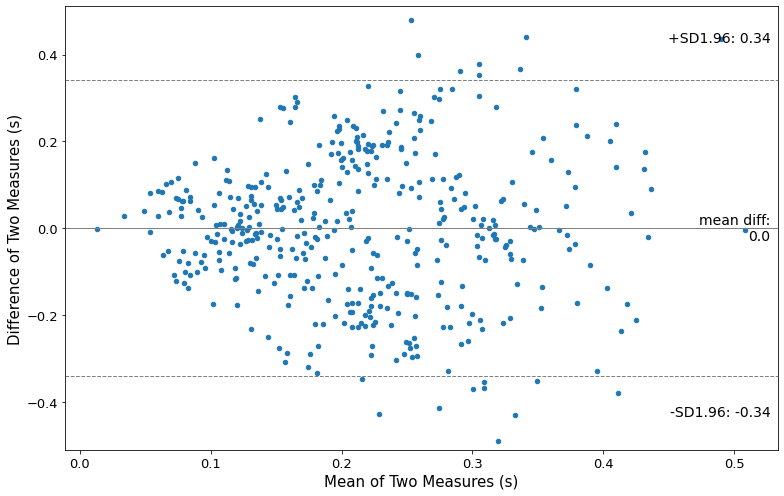

In [44]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Seed the random number generator.
# This ensures that the results below are reproducible.
times=np.random.seed(9999)

f, ax = plt.subplots(1, figsize = (11,7))

sm=sm.graphics.mean_diff_plot(data, data_1, ax = ax)

plt.xlabel("Mean of Two Measures (s)")
plt.ylabel("Difference of Two Measures (s)")
#plt.title('Bland-Altman of Ambulance')
plt.savefig('Final_Bland-Altaman_plot_.png', dpi=600)
plt.show()


## Bland Altman Plot with Pycompare 

In [45]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pyCompare as Compare
# Seed the random number generator.
# This ensures that the results below are reproducible.
np.random.seed(9999)

f, ax = plt.subplots(1, figsize = (11,7))
Compare.blandAltman(data, data_1, ax = ax, percentage=True, 
                      title='Bland Altman of Ambulance',
                      limitOfAgreement=1.55, meanColour='blue', loaColour='red', pointColour='#1b0830')

plt.xlabel("Mean of Two Measures (s)")
plt.ylabel("Difference of Two Measures (s)")
plt.savefig('Ambulance_Final_Bland-Altaman_plot_.png', dpi=600)
plt.show()


## Plotly Graphs with Audio files of Ambulance

In [46]:
!pip install plotly

In [47]:
import plotly.graph_objects as go
import numpy as np

N = 100000
fig = go.Figure(data=go.Scattergl(
    x = data,
    y = data_1,
    mode='markers',
    marker=dict(
        color=np.random.randn(N),
        colorscale='Viridis',
        line_width=1
    )
))

fig.show()

In [48]:
print(data.shape)
print(data_1.shape)
print(train.shape)

(430,)
(430,)
(860, 3)


In [49]:
train.label.value_counts()

Ambulance             430
Internet_Ambulance    430
Name: label, dtype: int64